# MASW - Multi-Channel Analysis of Surface Waves

> Joseph P. Vantassel, The University of Texas at Austin

This notebook performs MASW processing on a selected shot gather.

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np

import randtk.plot as randplot
import swprocess

## Input

In [2]:
start_stop_pairs = [(6,10), (11,15), (16,20), (26,30), (31, 35), (36,40)]

In [3]:
files_per_location = []
for start_stop in start_stop_pairs:
    start, stop = start_stop
    fnames = [f"sample_data/wghs/{x}.dat" for x in range(start,stop+1)]
    files_per_location.append(fnames)

arrays = []
for fnames in files_per_location:
    array = swprocess.Array1D.from_files(fnames)
    arrays.append(array) 

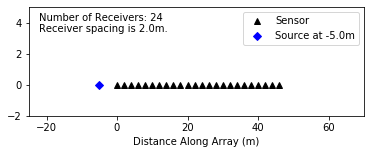

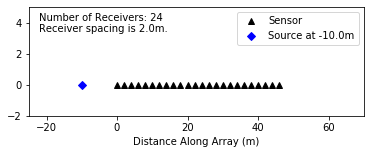

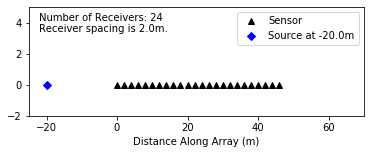

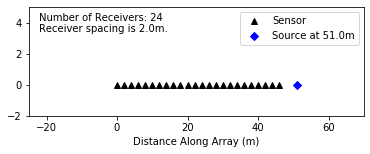

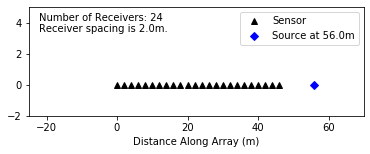

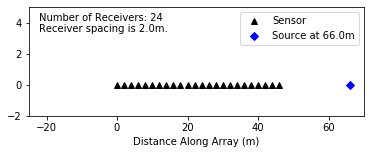

In [4]:
for array in arrays:
    fig, ax = array.plot()
    ax.set_xlim(-25,70)
plt.show()

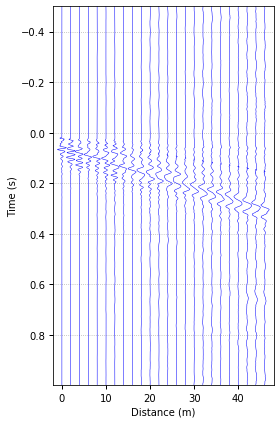

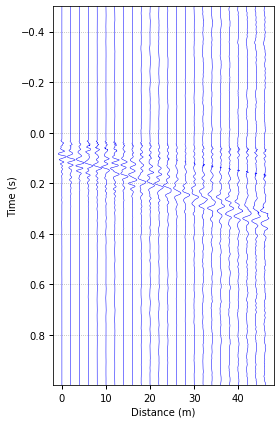

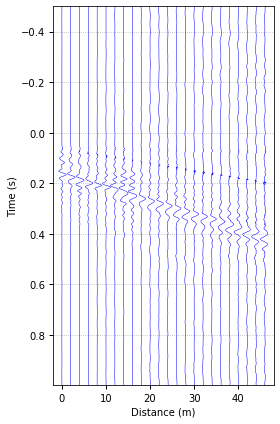

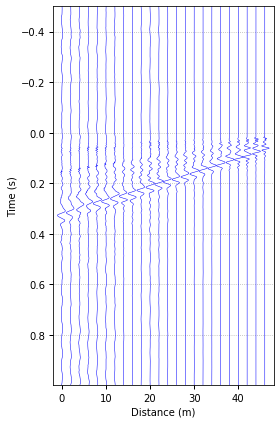

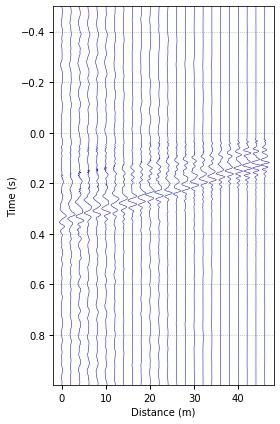

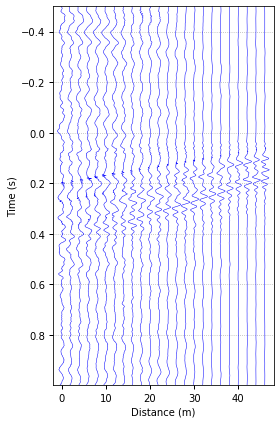

In [5]:
for array in arrays:
    fig, ax = array.waterfall()
plt.show()

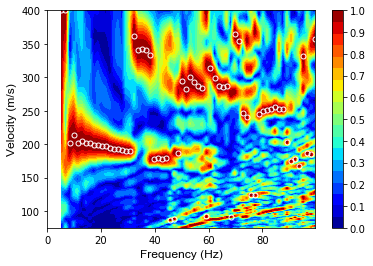

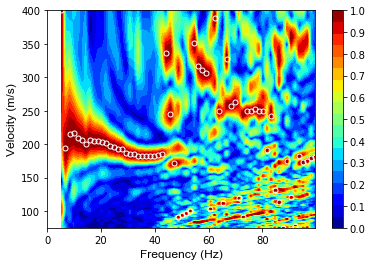

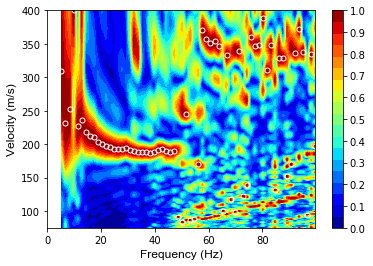

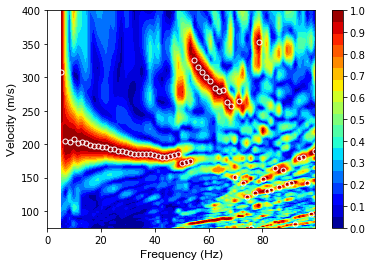

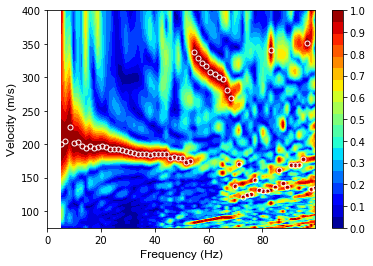

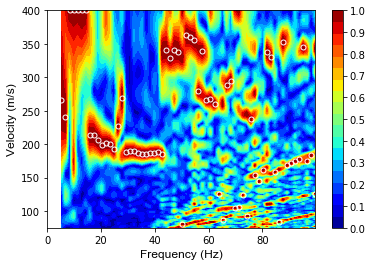

In [8]:
transforms = []
for array in arrays:
    transform = swprocess.WavefieldTransform1D(array, "sample_settings/settings_process.json")
    transforms.append(transform)

for transform in transforms:
    fig, ax = transform.plot_spectra()
plt.show()

In [9]:
fname = "active.json"

try:
    os.remove(fname)
except FileNotFoundError:
    print(f"No existing file named {fname}.")

for transform, array in zip(transforms, arrays):
    transform.write_peaks_to_file(fname, f"{array.source.x}m", append=True)

## Post-Process

In [14]:
fname = "active.json"

peaksuite = swprocess.PeaksSuite.from_jsons(fname)

In [15]:
peaksuite.blitz("velocity", (None, 600))
fig, ax = peaksuite.plot()
ax[0].legend(loc="center left", bbox_to_anchor=(1,0.5))
plt.show()

In [16]:
%matplotlib qt
peaksuite.interactive_trimming("sample_settings/settings_post.json")

Enter 1 to continue, 0 to quit, 2 to undo):  1
Enter 1 to continue, 0 to quit, 2 to undo):  0


(1, 100)

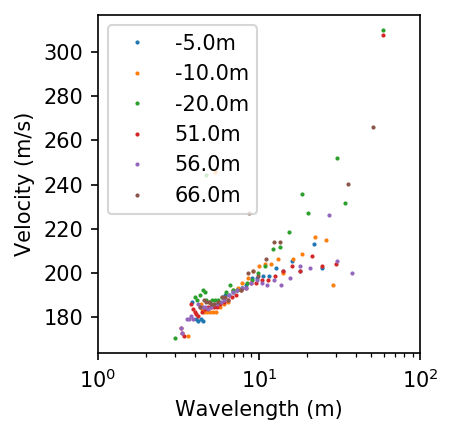

In [17]:
%matplotlib inline
fig, ax = peaksuite.plot(xtype="wavelength")
ax[0].set_xlim(1, 100)

In [18]:
stats = peaksuite.statistics(xx=np.geomspace(3, 30, 20), xtype="wavelength", ytype="velocity")

In [19]:
xx, mean, stddev, corr = stats

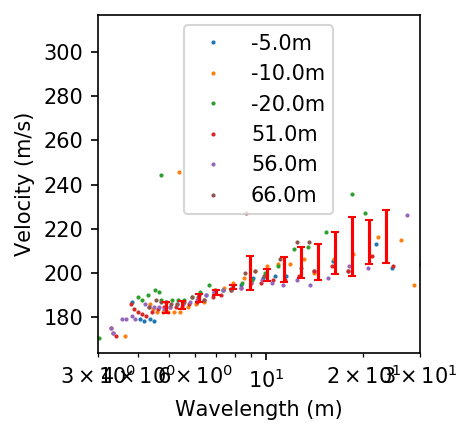

In [20]:
%matplotlib inline
fig, ax = peaksuite.plot(xtype="wavelength")
ax[0].errorbar(xx, mean, yerr=stddev, color="r", linestyle="", capsize=2, zorder=15)
ax[0].set_xlim(3, 30)
plt.show()

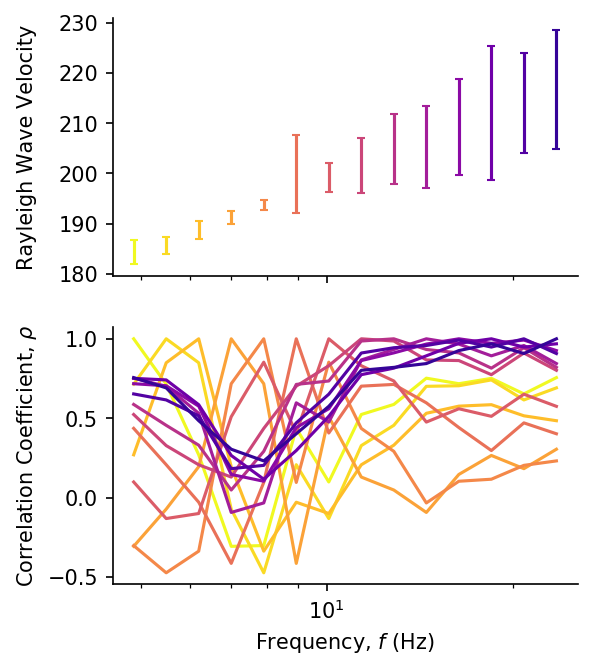

In [21]:
fig, axs = randplot.plot_stats(*stats)

for ax in axs:
    randplot.fancy_log_ax(ax)
plt.show()